In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
df=pd.read_csv('Global_Mobility_Report.csv')
df=df.loc[df.country_region_code=='US']
df=df[df.sub_region_1=='Washington']
df=df[df.sub_region_2=='King County']

In [2]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys




In [3]:
# import package
from kats.consts import TimeSeriesData
from kats.detectors.robust_stat_detection import RobustStatDetector
import matplotlib

df = df.rename(columns={"date": "time", "retail_and_recreation_percent_change_from_baseline": "value"})
df = df[["time", "value"]]
#df = df[df["time"] < '2020-04-01']
tsd = TimeSeriesData(df)
df



,time,value
7457151,2020-02-15,-1.0
7457152,2020-02-16,13.0
7457153,2020-02-17,10.0
7457154,2020-02-18,4.0
7457155,2020-02-19,2.0
...,...,...
7457782,2021-11-07,-11.0
7457783,2021-11-08,-19.0
7457784,2021-11-09,-20.0
7457785,2021-11-10,-16.0


In [4]:
detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=30, smoothing_window_size=30, p_value_cutoff=0.001)

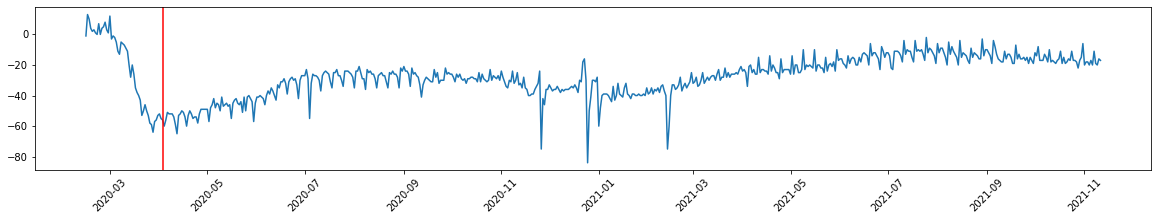

In [5]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()